# Windows 10, py-visa

Testing on more platforms.

In [ ]:
import mhs5200

signal_gen = mhs5200.MHS5200("COM4")

In [4]:
import pyvisa
rm = pyvisa.ResourceManager()
rm.list_resources()

scope = rm.open_resource('USB0::0x1AB1::0x0588::DS1EU152500705::INSTR')

In [8]:
for channel in [1, 2]:
    for setting in ["BWLIMIT", "COUPLING", "DISPLAY", "INVERT", "OFFSET", "PROBE", "SCALE", "FILTER", "MEMORYDEPTH", "VERNIER"]:
        try:
            result = scope.query(f":CHANNEL{channel}:{setting}?")
            print(f"{channel}:{setting}:{result}")
        except:
            print(f"FAILED: {channel}:{setting}")

1:BWLIMIT:OFF
1:COUPLING:DC
1:DISPLAY:1
1:INVERT:OFF
1:OFFSET:1.000e-01
1:PROBE:1.000e+00
1:SCALE:1.000e-01
1:FILTER:OFF
1:MEMORYDEPTH:8192
1:VERNIER:Coarse
2:BWLIMIT:OFF
2:COUPLING:DC
2:DISPLAY:1
2:INVERT:OFF
2:OFFSET:-1.000e-01
2:PROBE:1.000e+00
2:SCALE:1.000e-01
2:FILTER:OFF
2:MEMORYDEPTH:8192
2:VERNIER:Coarse


In [7]:
import time

In [8]:
def test_frequency_amplitude(frequency, amplitude, signal_gen, scope):
    for chan in signal_gen.channels:
        chan.frequency=frequency
        chan.amplitude=amplitude
        chan.phase=0
    
    period = 1/float(frequency)
    timescale="{:.20f}".format(float(period/5))
    # Configure scope
    
    scope.write(f":MEASURE:TOTAL ON")
    scope.write(f":TIMebase:SCALE {timescale}")
    for scope_channel in [1, 2]:
        scope.write(f":CHANNEL{scope_channel}:probe 1")
        scope.write(f":CHANNEL{scope_channel}:scale {amplitude/5}")
        scope.write(f":CHANNEL{scope_channel}:offset 0")
    # Configure signal generator
    for chan in signal_gen.channels:
        chan.frequency=frequency
        chan.amplitude=amplitude
        chan.offset = 0
        chan.phase=0

    for source in ["CHAN1", "CHAN2"]:
        scope.write(f":MEASURE:SOURCE {source}")
        time.sleep(1)
        for param in ["FREQUENCY", "VPP", "VMIN", "VMAX", "VAMPLITUDE"]:
            measured = scope.query_ascii_values(f":MEASURE:{param}?")[0]
            print(f"{source}:{param}:{measured}")

In [9]:
test_frequency_amplitude(100, 10, signal_gen=signal_gen, scope=scope)

CHAN1:FREQUENCY:100.0
CHAN1:VPP:10.7
CHAN1:VMIN:-5.36
CHAN1:VMAX:5.36
CHAN1:VAMPLITUDE:10.5
CHAN2:FREQUENCY:100.0
CHAN2:VPP:1.2
CHAN2:VMIN:-0.56
CHAN2:VMAX:0.64
CHAN2:VAMPLITUDE:1.11


In [10]:
import numpy as np

In [20]:
np.log10(50e6)

7.698970004336019

In [24]:
for frequency in np.logspace(np.log10(100), np.log10(1000000), 2):
    for amplitude in [20]:
        test_frequency_amplitude(frequency, amplitude, signal_gen=signal_gen, scope=scope)

CHAN1:FREQUENCY:10.0
CHAN1:VPP:21.0
CHAN1:VMIN:-10.4
CHAN1:VMAX:10.6
CHAN1:VAMPLITUDE:20.6
CHAN2:FREQUENCY:10.0
CHAN2:VPP:2.4
CHAN2:VMIN:-1.12
CHAN2:VMAX:1.28
CHAN2:VAMPLITUDE:2.22
CHAN1:FREQUENCY:9.9e+37
CHAN1:VPP:21.3
CHAN1:VMIN:-10.2
CHAN1:VMAX:11.0
CHAN1:VAMPLITUDE:20.9
CHAN2:FREQUENCY:9.9e+37
CHAN2:VPP:2.4
CHAN2:VMIN:-1.12
CHAN2:VMAX:1.28
CHAN2:VAMPLITUDE:1.97


In [26]:
import pandas as pd

In [27]:
df = pandas.DataFrame()

In [36]:
import uuid

In [47]:
def test_frequency_amplitude2(frequency, amplitude, signal_gen, scope):
    for chan in signal_gen.channels:
        chan.frequency=frequency
        chan.amplitude=amplitude
        chan.phase=0
    
    period = 1/float(frequency)
    timescale="{:.20f}".format(float(period/5))
    # Configure scope
    
    scope.write(f":MEASURE:TOTAL ON")
    scope.write(f":TIMebase:SCALE {timescale}")
    for scope_channel in [1, 2]:
        scope.write(f":CHANNEL{scope_channel}:probe 1")
        scope.write(f":CHANNEL{scope_channel}:scale {amplitude/5}")
        scope.write(f":CHANNEL{scope_channel}:offset 0")
    # Configure signal generator
    for chan in signal_gen.channels:
        chan.frequency=frequency
        chan.amplitude=amplitude
        chan.offset = 0
        chan.phase=0

    df = dict()
    df["uuid"] = str(uuid.uuid4())
    df["frequency"] = frequency
    df["amplitude"] = amplitude
    for source in ["CHAN1", "CHAN2"]:
        scope.write(f":MEASURE:SOURCE {source}")
        time.sleep(1)
        for param in ["FREQUENCY", "VPP", "VMIN", "VMAX", "VAMPLITUDE"]:
            measured = scope.query_ascii_values(f":MEASURE:{param}?")[0]

            df[f"{source}_{param}"] = measured
    return pandas.DataFrame(df, index=[0])

In [53]:
df = df.append(test_frequency_amplitude2(100, 10, signal_gen, scope))

In [55]:
df = pd.DataFrame()
for frequency in np.logspace(np.log10(100), np.log10(1000000), 10):
    for amplitude in [1, 5, 10, 20]:
        result_df = test_frequency_amplitude2(frequency, amplitude, signal_gen=signal_gen, scope=scope)
        df = df.append(result_df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019F9E533748>]],
      dtype=object)

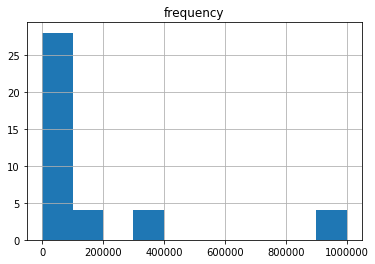

In [60]:
df.hist("frequency", bins=10)

In [61]:
def test_frequency_amplitude3(frequency, amplitude, signal_gen, scope):
    for chan in signal_gen.channels:
        chan.frequency=frequency
        chan.amplitude=amplitude
        chan.phase=0
    
    period = 1/float(frequency)
    timescale="{:.20f}".format(float(period/5))
    # Configure scope
    
    scope.write(f":MEASURE:TOTAL ON")
    scope.write(f":TIMebase:SCALE {timescale}")
    for scope_channel in [1, 2]:
        scope.write(f":CHANNEL{scope_channel}:probe 1")
        scope.write(f":CHANNEL{scope_channel}:scale {amplitude/5}")
        scope.write(f":CHANNEL{scope_channel}:offset 0")
    # Configure signal generator
    for chan in signal_gen.channels:
        chan.frequency=frequency
        chan.amplitude=amplitude
        chan.offset = 0
        chan.phase=0

    df = dict()
    df["uuid"] = str(uuid.uuid4())
    df["frequency"] = frequency
    df["amplitude"] = amplitude
    for source in ["CHAN1", "CHAN2"]:
        scope.write(f":MEASURE:SOURCE {source}")
        time.sleep(1)
        for param in ['VPP',
                        'VMAX',
                        'VMIN',
                        'VAMPlitude',
                        'VTOP',
                        'VBASe',
                        'VAVerage',
                        'VRMS',
                        'OVERshoot',
                        'PREShoot',
                        'FREQuency',
                        'RISetime',
                        'FALLtime',
                        'PERiod',
                        'PWIDth',
                        'NWIDth',
                        'PDUTycycle',
                        'NDUTycycle',
                        'PDELay',
                        'NDELay',
                        'TOTal',
                        'SOURce',]:
            try:
                measured = scope.query_ascii_values(f":MEASURE:{param}?")[0]
            except:
                measured = scope.query(f":MEASURE:{param}?")[0]

            df[f"{source}_{param}"] = measured
    return pandas.DataFrame(df, index=[0])

In [62]:
df = pd.DataFrame()
for frequency in np.logspace(np.log10(100), np.log10(100000000), 20):
    for amplitude in [1, 5, 10, 20]:
        result_df = test_frequency_amplitude2(frequency, amplitude, signal_gen=signal_gen, scope=scope)
        df = df.append(result_df)

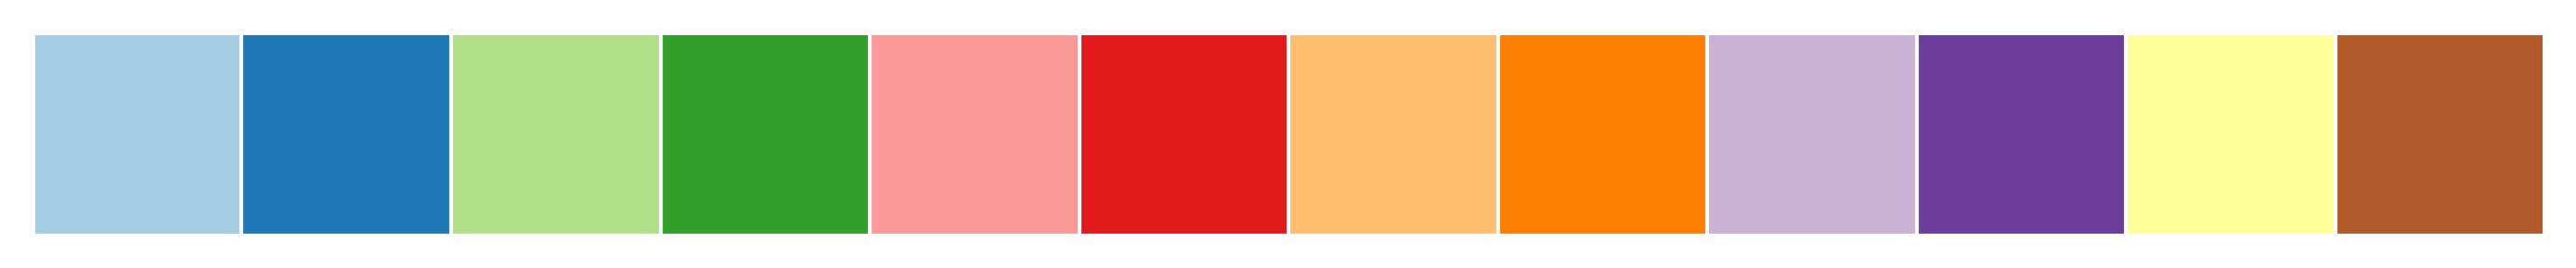

In [133]:
import seaborn as sns

sns.set(
    rc={
        "figure.figsize": (11, 8.5),
        "figure.dpi": 300,
        "figure.facecolor": "w",
        "figure.edgecolor": "k",
    }
)
palette = (sns.color_palette("Paired"))
sns.palplot(palette)
sns.set_palette(palette)

In [65]:
df.groupby(["frequency", "amplitude"]).agg()

CHAN1_FREQUENCY  CHAN1_VPP  CHAN1_VMIN  CHAN1_VMAX  \
frequency    amplitude                                                       
1.000000e+02 1             1.000000e+02      0.976      -0.480       0.496   
             5             1.000000e+02      5.360      -2.680       2.680   
             10            1.000000e+02     10.800      -5.360       5.440   
             20            1.000000e+02     21.000     -10.400      10.600   
2.069138e+02 1             2.070000e+02      0.976      -0.480       0.496   
             5             2.070000e+02      5.400      -2.680       2.680   
             10            2.070000e+02     10.900      -5.360       5.520   
             20            2.070000e+02     21.100     -10.400      10.700   
4.281332e+02 1             4.270000e+02      0.984      -0.488       0.496   
             5             4.270000e+02      5.400      -2.720       2.680   
             10            4.270000e+02     10.900      -5.440       5.440   
             20            4.270000e+02     21.400     -10.600      10.900   
8.858668e+02 1             8.860000e+02      0.976      -0.480       0.496   
             5             8.860000e+02      5.440      -2.720       2.720   
             10            8.860000e+02     11.000      -5.440       5.600   
             20            8.860000e+02     21.900     -10.900      11.000   
1.832981e+03 1             1.820000e+03      0.984      -0.488       0.496   
             5             1.820000e+03      5.440      -2.720       2.720   
             10            1.820000e+03     11.000      -5.440       5.600   
             20            1.820000e+03     22.100     -10.900      11.200   
3.792690e+03 1             3.790000e+03      0.992      -0.488       0.504   
             5             3.790000e+03      5.440      -2.720       2.720   
             10            3.790000e+03     11.000      -5.440       5.600   
             20            3.790000e+03     22.400     -11.000      11.400   
7.847600e+03 1             7.810000e+03      0.984      -0.488       0.496   
             5             7.810000e+03      5.520      -2.760       2.760   
             10            7.840000e+03     11.000      -5.440       5.600   
             20            7.840000e+03     22.200     -10.900      11.400   
1.623777e+04 1             1.620000e+04      0.992      -0.488       0.504   
             5             1.620000e+04      5.520      -2.760       2.760   
...                                 ...        ...         ...         ...   
6.158482e+05 10            6.160000e+05     11.100      -5.520       5.600   
             20            6.140000e+05     22.400     -11.000      11.400   
1.274275e+06 1             1.280000e+06      0.992      -0.488       0.504   
             5             1.280000e+06      5.400      -2.720       2.680   
             10            1.280000e+06     11.100      -5.600       5.520   
             20            1.270000e+06     22.200     -11.000      11.200   
2.636651e+06 1             2.670000e+06      0.984      -0.480       0.504   
             5             2.630000e+06      5.400      -2.720       2.680   
             10            2.620000e+06     11.000      -5.520       5.520   
             20            2.620000e+06     21.800     -10.700      11.000   
5.455595e+06 1             5.490000e+06      1.000      -0.496       0.504   
             5             5.490000e+06      5.400      -2.720       2.680   
             10            5.490000e+06     11.000      -5.440       5.520   
             20            5.490000e+06     21.600     -10.700      10.900   
1.128838e+07 1             1.170000e+07      0.960      -0.472       0.488   
             5             1.170000e+07      5.320      -2.640       2.680   
             10            1.170000e+07     10.700      -5.280       5.440   
             20            1.190000e+07     19.400      -8.480      10.900   
2.335721e+07 1             2.500000e+07      0

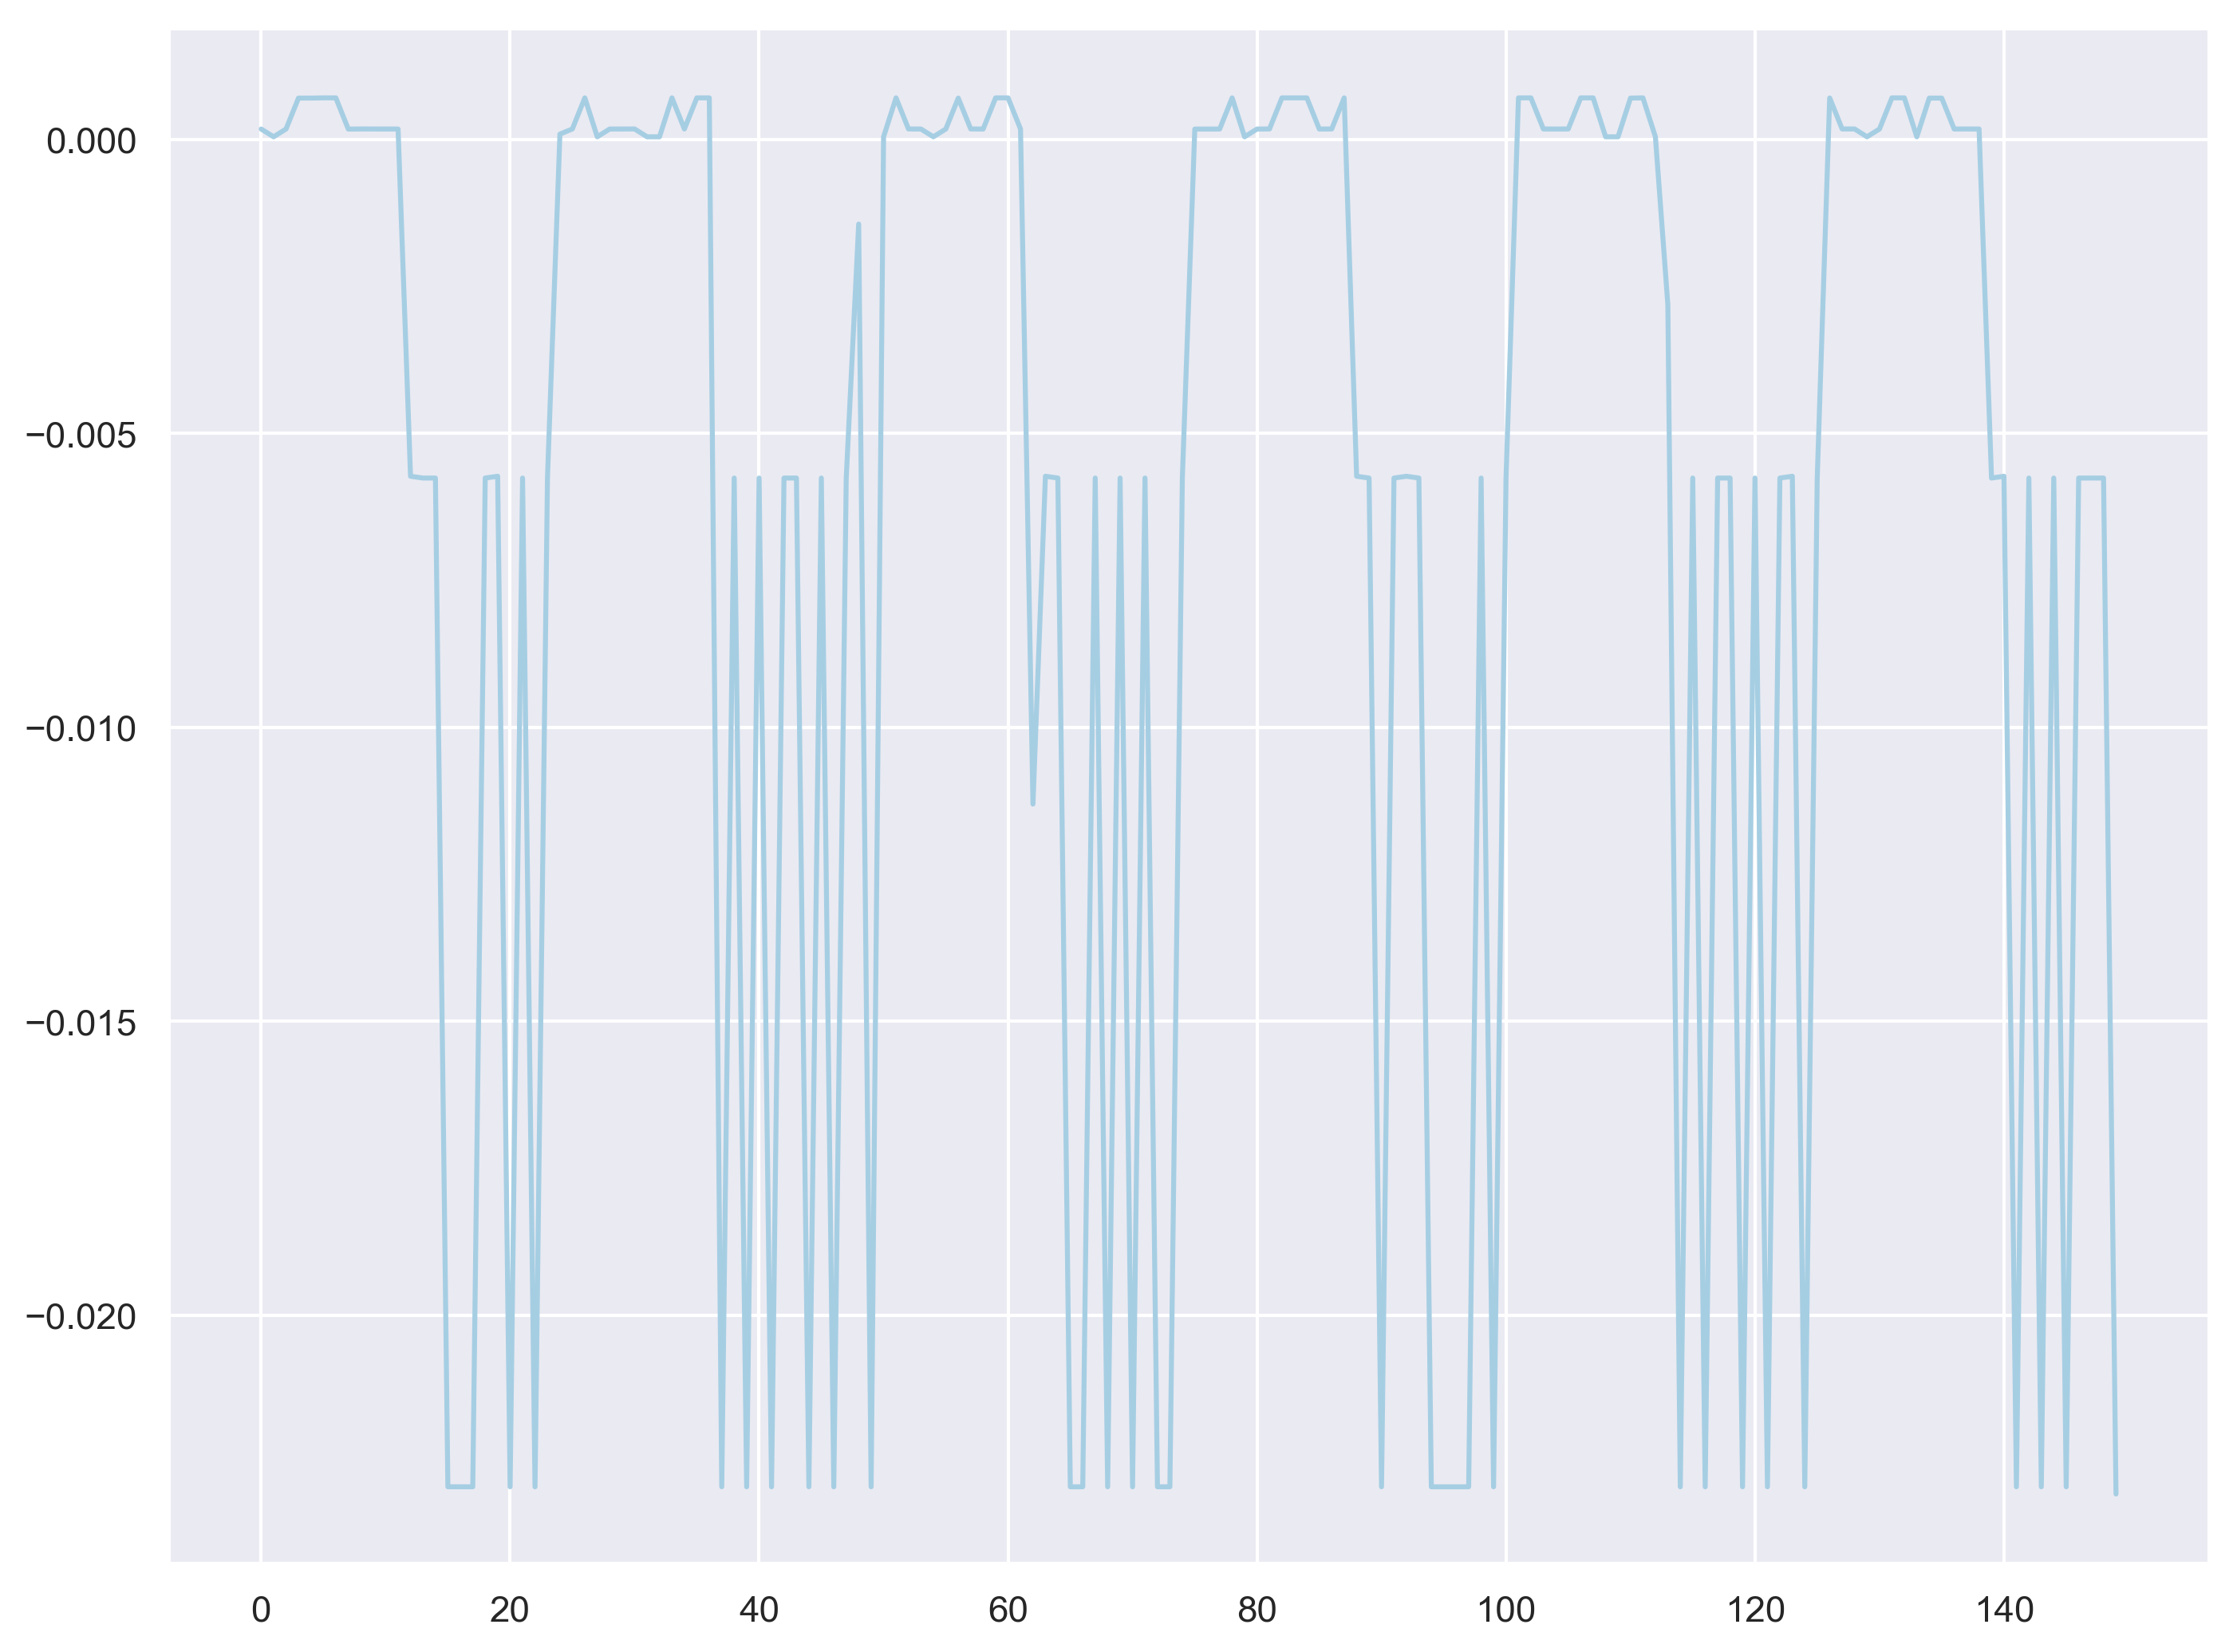

In [139]:
data = scope.query_binary_values(":WAVEFORM:DATA? CHAN1")
plt.plot(data)

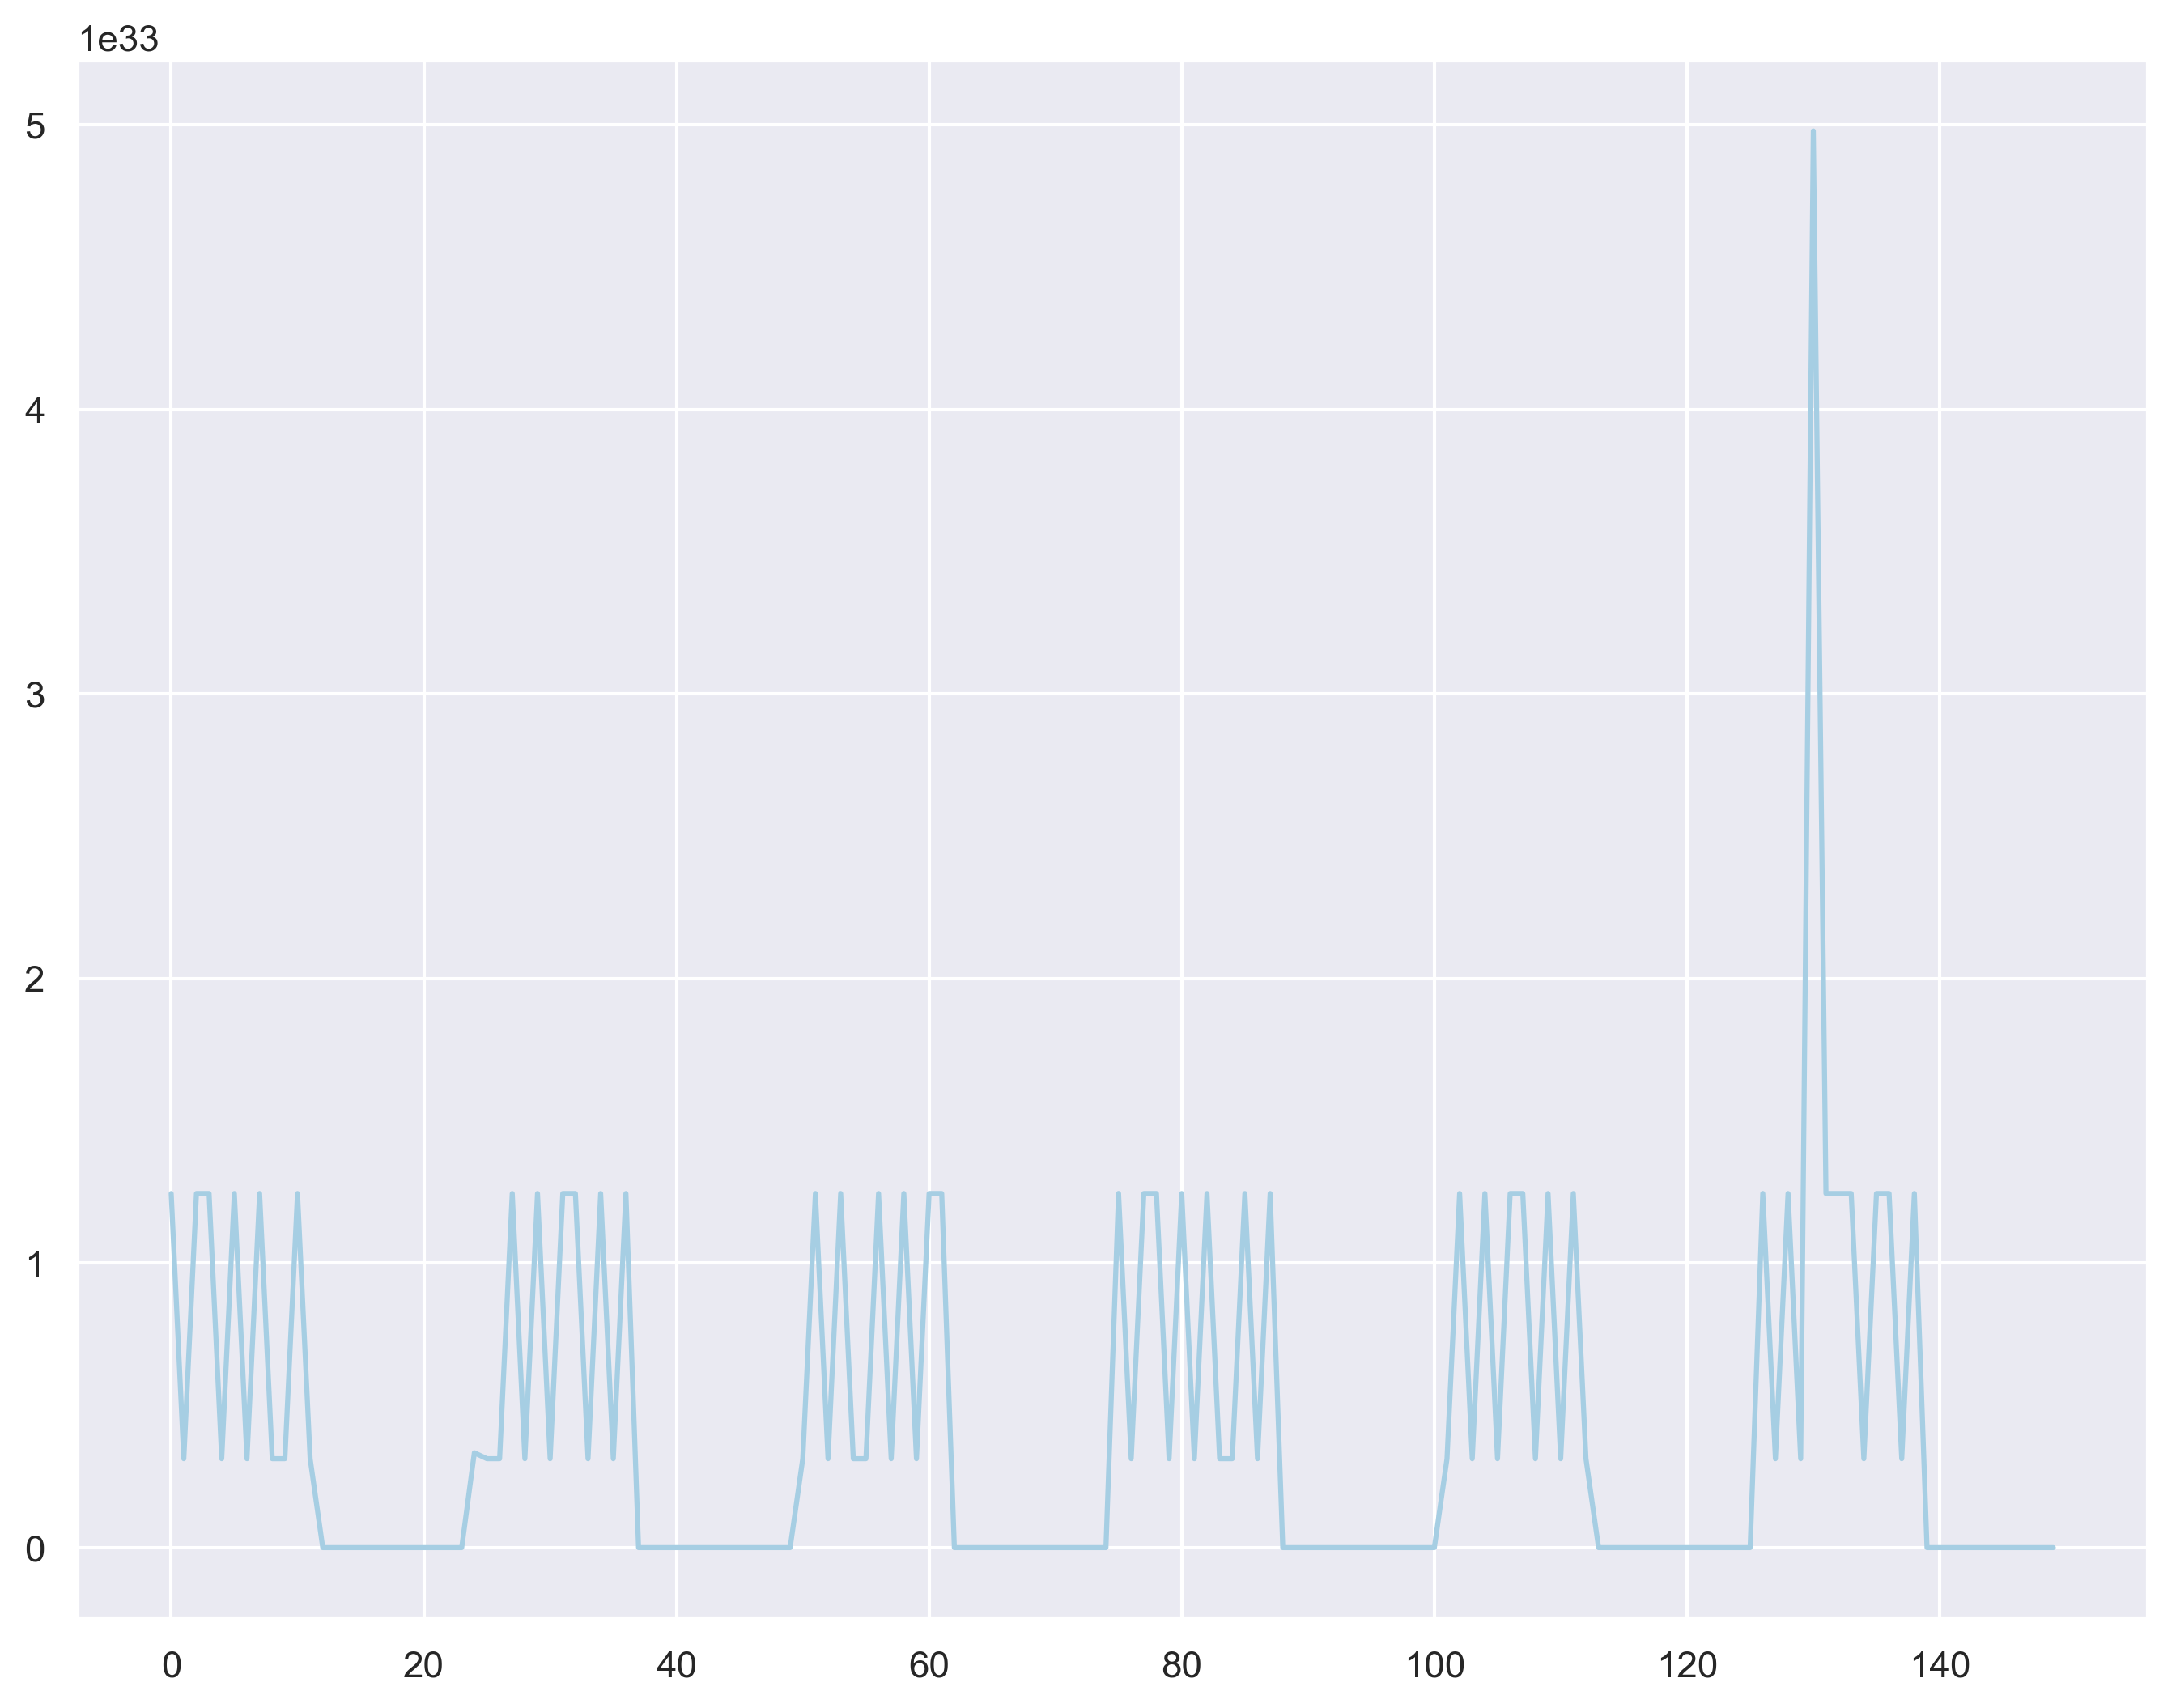

In [141]:
data = scope.query_binary_values(":WAVEFORM:DATA? CHAN2")
plt.plot(data)

In [142]:
scope.query(":ACQ:SAMP? CHANnel2")

'682.666687'

In [146]:
scope.query(":ACQ:MEMD?")

'LONG'

In [145]:
scope.write(":ACQ:MEMD LONG")

(16, <StatusCode.success: 0>)

In [148]:
for depth in ["NORMAL", "LONG"]:
    scope.write(f":ACQ:MEMD {depth}")
    time.sleep(0.5)
    assert depth == scope.query(":ACQ:MEMD?")

In [27]:
import matplotlib.pyplot as plt

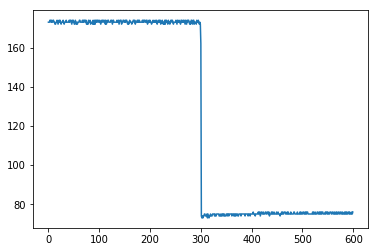

In [32]:
data = scope.query_binary_values(":WAVEFORM:DATA? CHAN1", "B")
plt.plot(data)

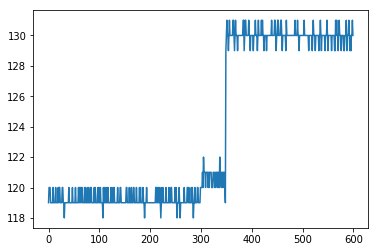

In [33]:
data = scope.query_binary_values(":WAVEFORM:DATA? CHAN2", "B")
plt.plot(data)

In [ ]:
scope.q

In [158]:
?scope.query_binary_values

In [160]:
scope.query(":WAVEFORM:POINTS:MODE?")

'RAW'

In [199]:
scope.write(":WAVEFORM:DATA? CHANNEL1")
header = scope.read_raw()[:10]
header

b'#800000600'

In [209]:
scope.write(":WAVEFORM:DATA? CHANNEL1")
data = scope.read_raw()[10:]

In [194]:
data[0]

56

In [195]:
data[0:1]

b'8'

In [193]:
data[0:2]

b'88'

In [196]:
import numpy as np

In [201]:
np.array(56).tobytes()

b'8\x00\x00\x00'

In [206]:
np.array(56).tobytes("C")

b'8\x00\x00\x00'

In [207]:
np.array(56).tobytes("F")

b'8\x00\x00\x00'

In [208]:
np.array(56.0).tobytes("F")

b'\x00\x00\x00\x00\x00\x00L@'

In [210]:
np.frombuffer(np.array(56).tobytes("F"))

ValueError: buffer size must be a multiple of element size

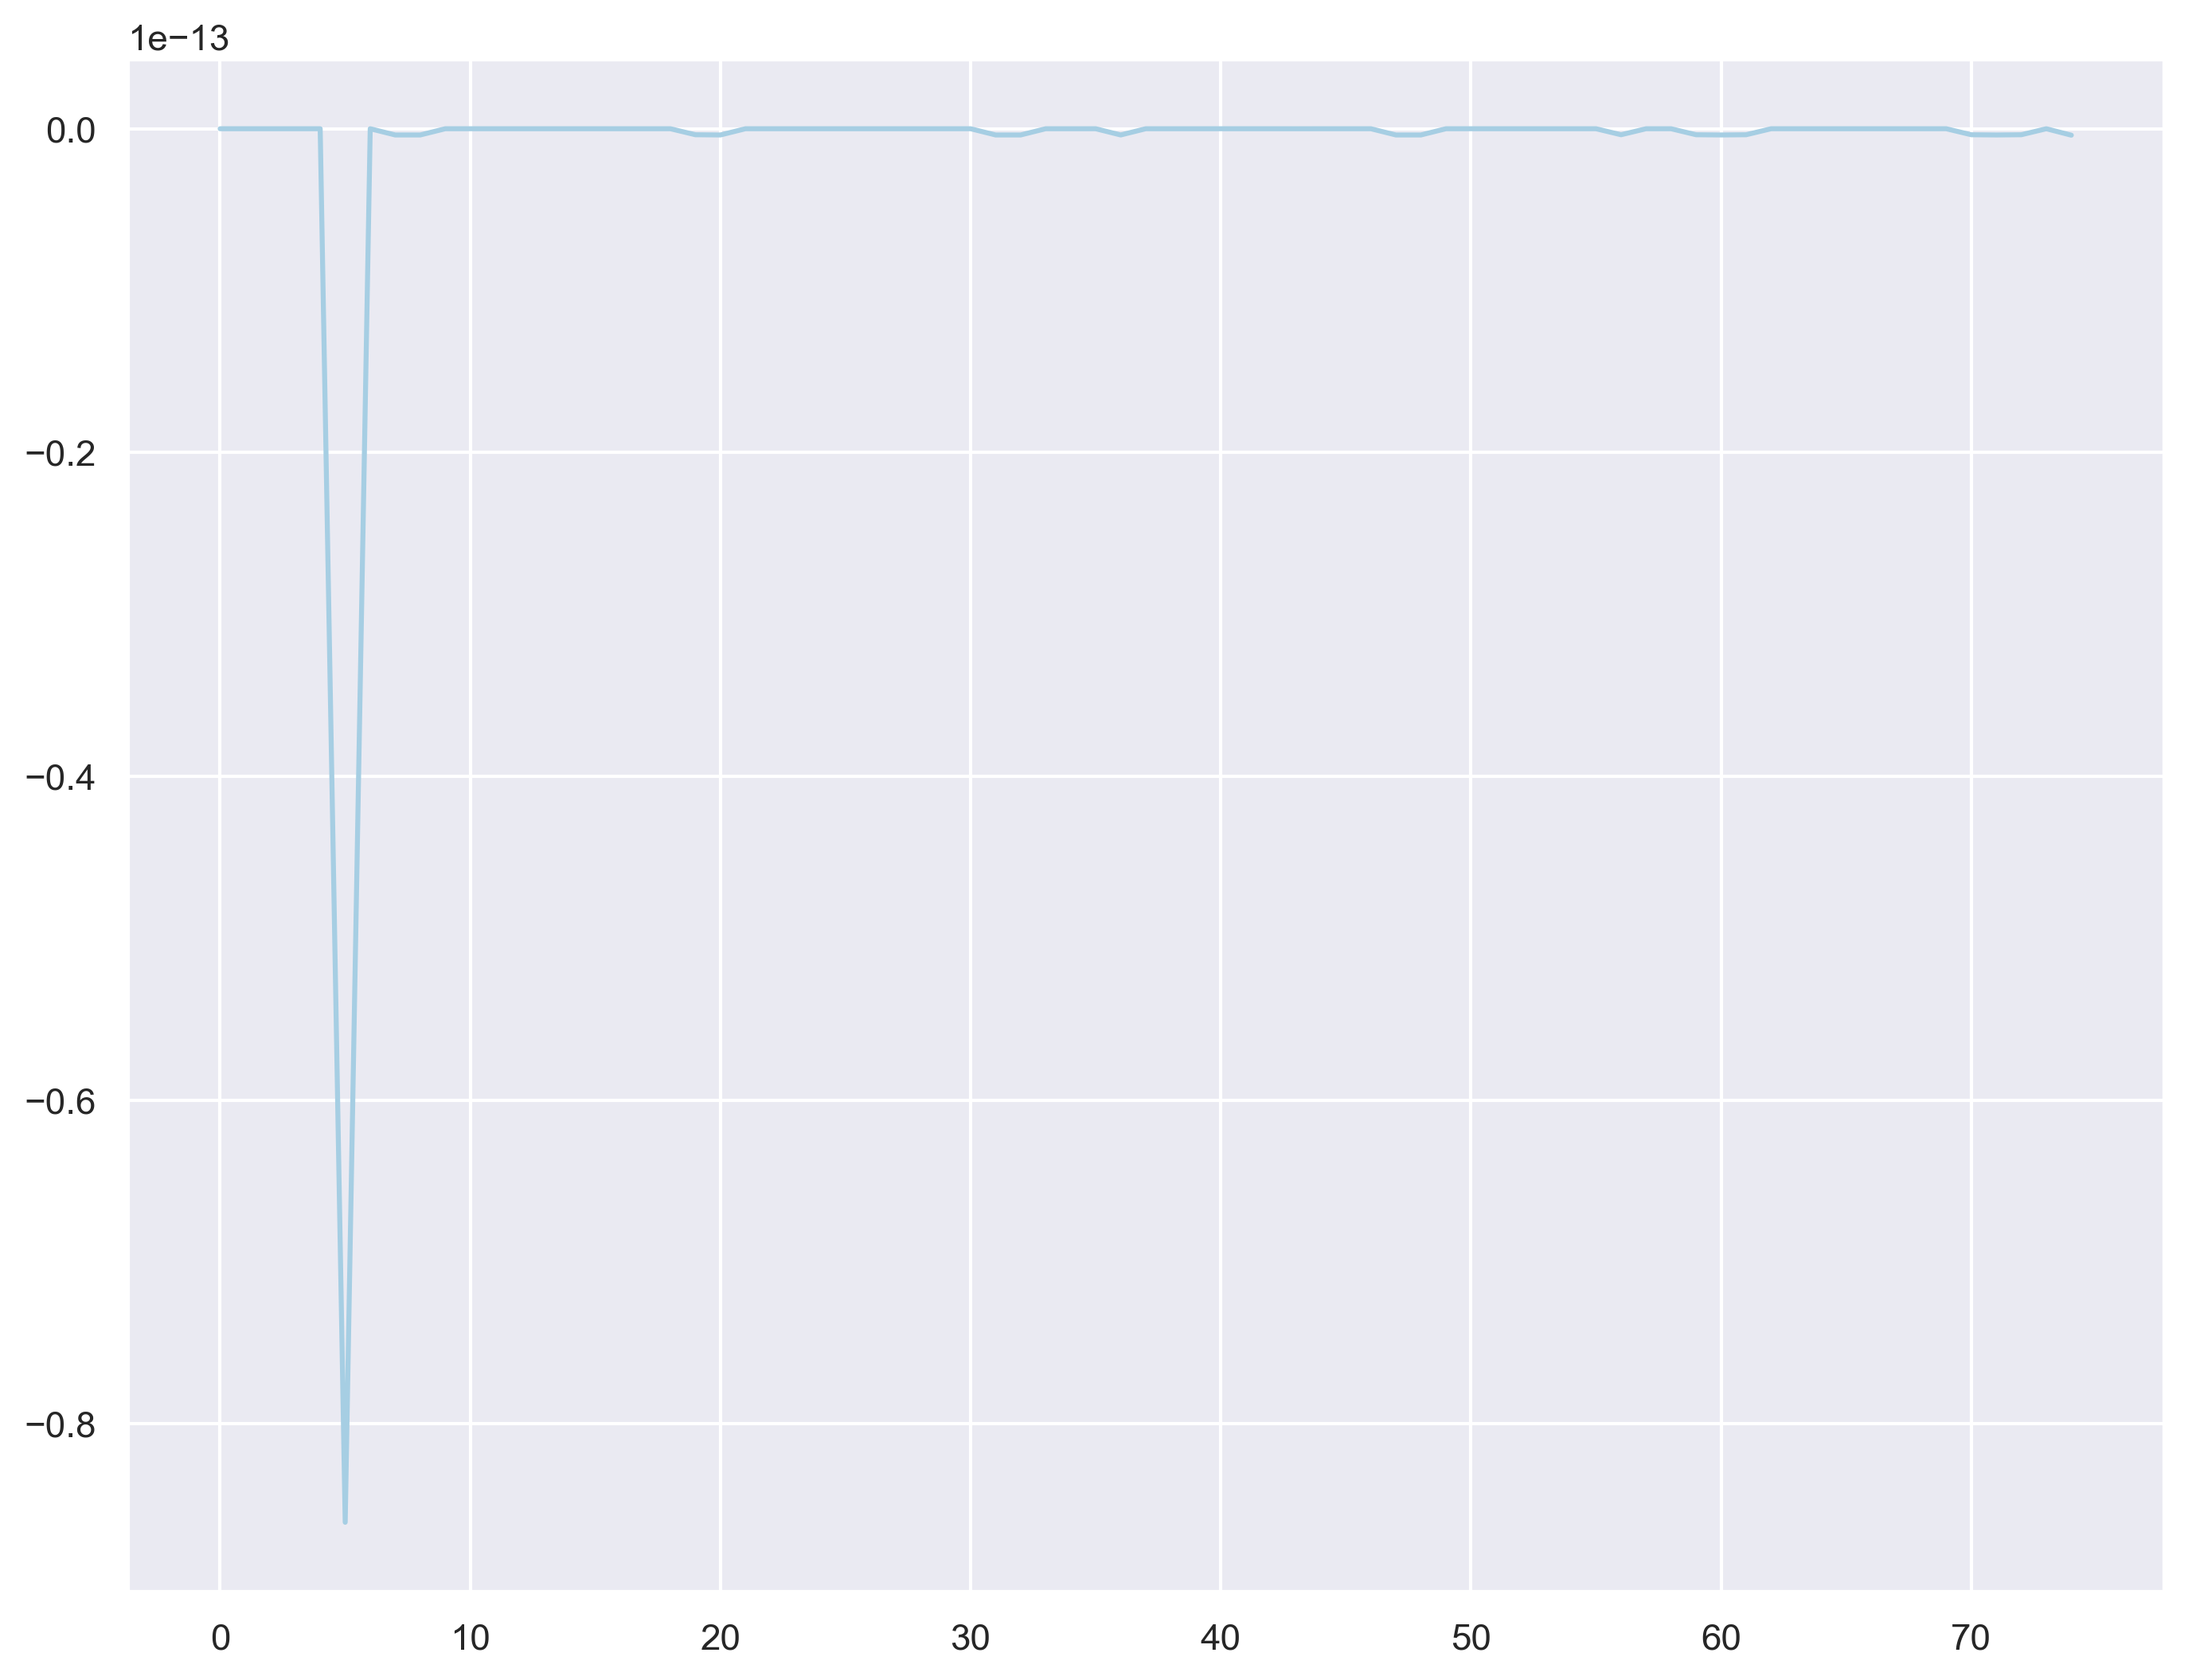

In [212]:
dt = np.dtype(float)
dt = dt.newbyteorder(">")
plt.plot(np.frombuffer(data))

In [216]:
np.frombuffer(b'\x01\x02', dtype=np.uint8)

array([1, 2], dtype=uint8)

In [217]:
np.frombuffer(b'\x01\x02\x03\x04\x05', dtype=np.uint8, count=3)

array([1, 2, 3], dtype=uint8)

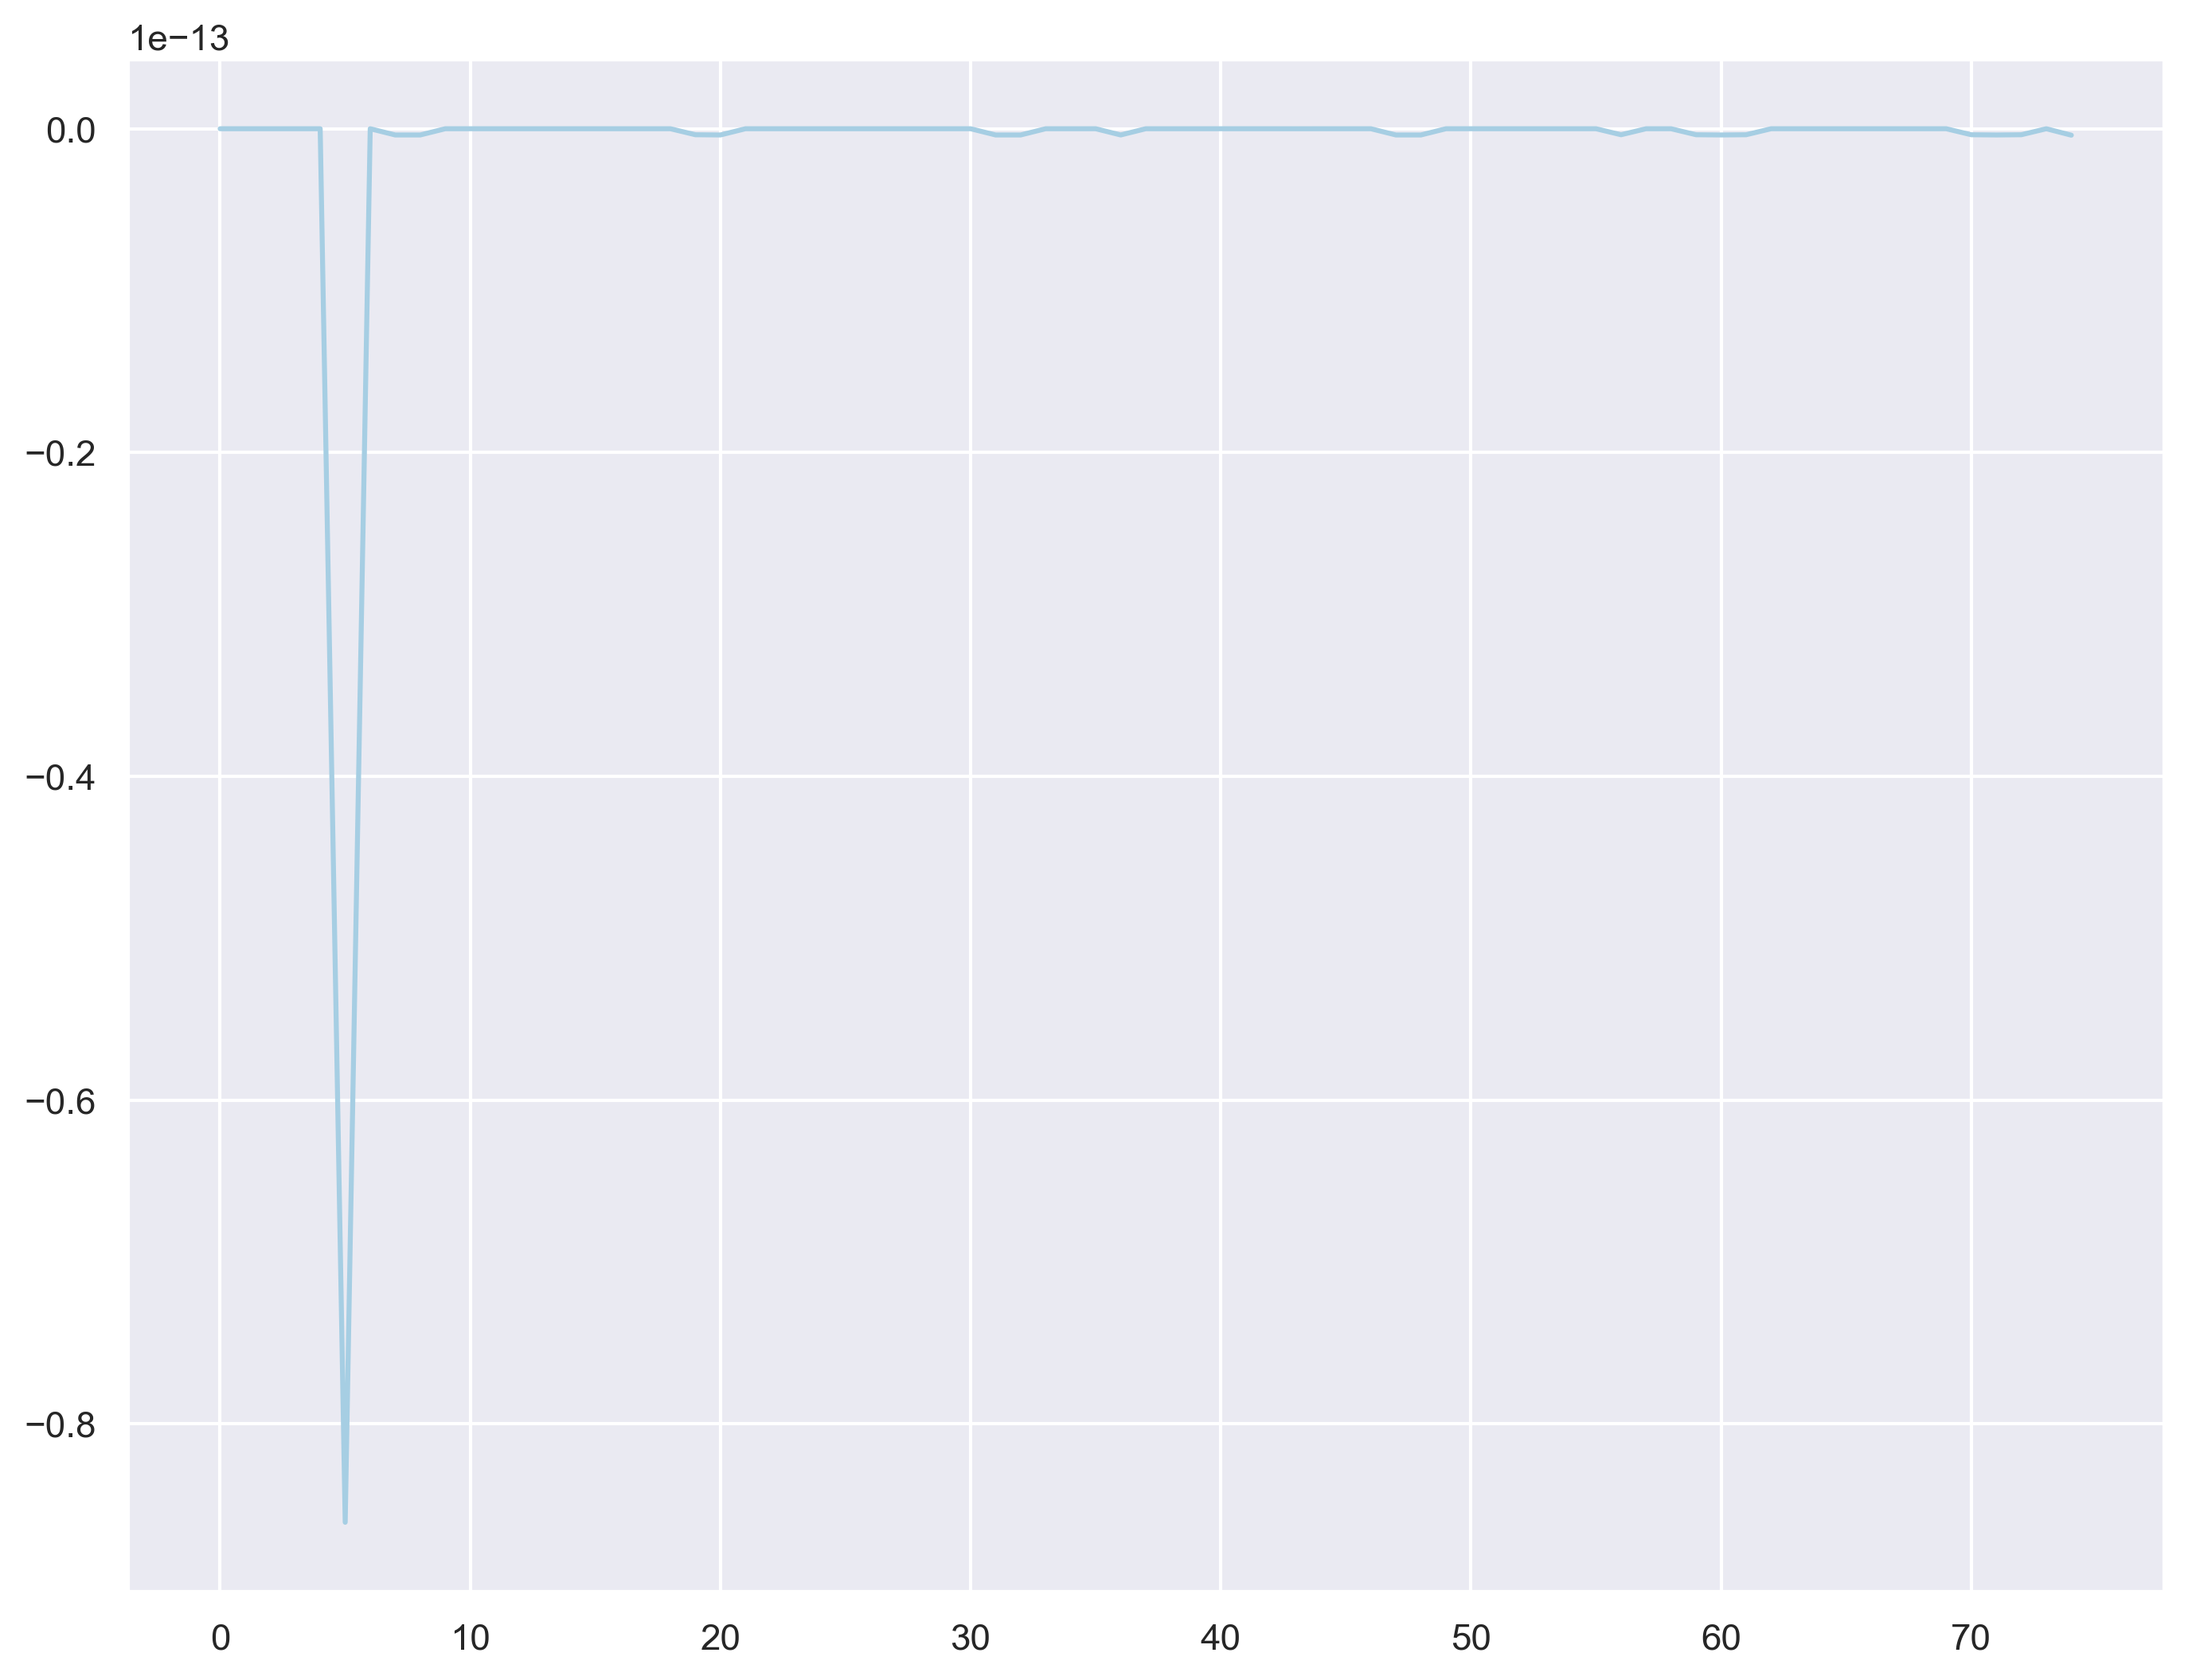

In [218]:
dt = np.dtype(float)
dt = dt.newbyteorder("<")
plt.plot(np.frombuffer(data))